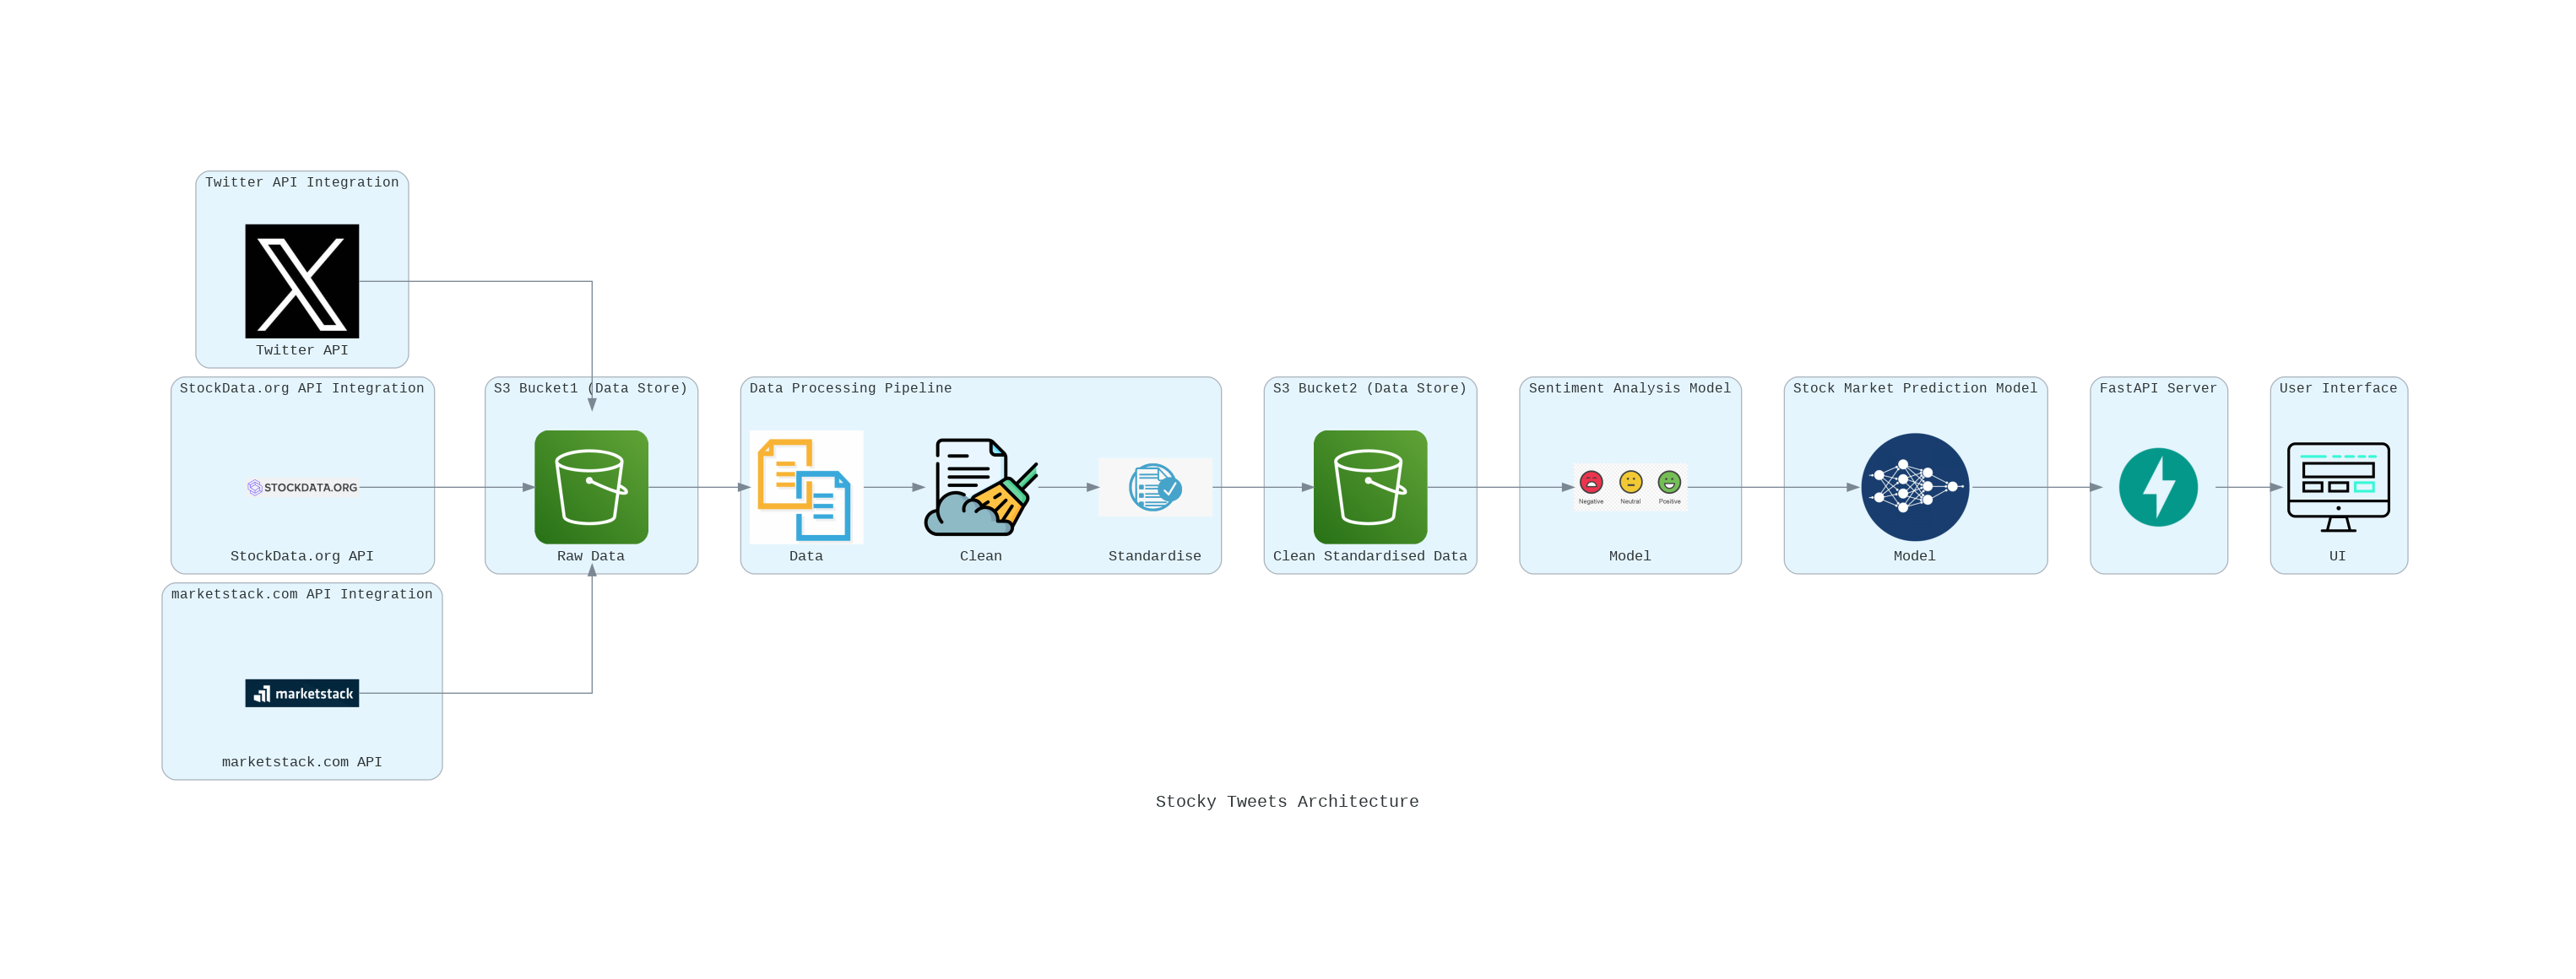

In [ ]:
!pip install diagrams
from diagrams import Diagram, Cluster, Edge, Node
from diagrams.aws.storage import S3
from diagrams.custom import Custom
from diagrams.aws.network import APIGateway
from diagrams.programming.framework import FastAPI

# Define the diagram object
diagram = Diagram("Stocky Tweets Architecture", show=False, direction="LR")

with diagram:
    with Cluster("Twitter API Integration"):
      twitter_api = Custom("Twitter API", "./twitter.png")

    with Cluster("StockData.org API Integration"):
      stock_data_org_api = Custom("StockData.org API", "./stockDataOrg.png")

    with Cluster("marketstack.com API Integration"):
      market_stack_api = Custom("marketstack.com API", "./marketStack.png")


    with Cluster("Data Processing Pipeline"):
        data_processing = [
            Custom("Data", "./Data.png"),
            Custom("Clean", "./data-cleaning.png"),
            Custom("Standardise", "./standardisedData.png"),
        ]

    with Cluster("S3 Bucket1 (Data Store)"):
        s3_bucket_unclean = S3("Raw Data")

    with Cluster("S3 Bucket2 (Data Store)"):
        s3_bucket_clean = S3("Clean Standardised Data")

    with Cluster("Sentiment Analysis Model"):
        sentiment_analysis = Custom("Model", "./sentiment_model.png")

    with Cluster("Stock Market Prediction Model"):
        prediction_model = Custom("Model", "./ml_logo.png")

    with Cluster("User Interface"):
        user_interface = Custom("UI", "./UI.png")

    with Cluster("FastAPI Server"):
        api_gateway = FastAPI("")


    # Connect components using >> format
    [twitter_api, stock_data_org_api, market_stack_api ]>> s3_bucket_unclean
    s3_bucket_unclean >> data_processing[0]
    data_processing[0] >> data_processing[1]
    data_processing[1] >> data_processing[2]
    data_processing[2] >> s3_bucket_clean
    s3_bucket_clean >> sentiment_analysis
    sentiment_analysis >> prediction_model
    prediction_model >> api_gateway
    api_gateway >> user_interface

# Display the diagram directly in Colab
display(diagram)
